<a href="https://colab.research.google.com/github/CervantesMCinthiaK/Metodos-Numericos/blob/main/Polinomio%20O%20Hermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polinomio Osculante de Hermite con Sympy
Cervantes Martinez Cinthia Karina

In [88]:
#Importamos las librerias que usaremos
import sympy as sp
import matplotlib.pyplot as plt

In [89]:
# Funcion para ingresar los puntos y las derivadas que se utilizaran
def obtener_datos():
    # Pedir al usuario el numero de puntos
    n = int(input("¿Cuantos puntos de datos deseas ingresar? "))

    # Inicializamos con listas vacias
    x_vals = []
    f_vals = []
    f_prime_vals = []

    # Pedir los valores de los puntos (x), f(x) y f'(x)
    for i in range(n):
        x_i = float(input(f"Ingrese el valor de x_{i+1}: "))
        f_i = float(input(f"Ingrese el valor de f(x_{i+1}): "))
        f_prime_i = float(input(f"Ingrese el valor de f'(x_{i+1}): "))

        # Agregar a las listas
        x_vals.append(x_i)
        f_vals.append(f_i)
        f_prime_vals.append(f_prime_i)

    # Retornar los valores
    return x_vals, f_vals, f_prime_vals

# Obtener los datos ingresados por el usuario
x_vals, f_vals, f_prime_vals = obtener_datos()



¿Cuantos puntos de datos deseas ingresar? 3
Ingrese el valor de x_1: 1.3
Ingrese el valor de f(x_1): 0.6200860
Ingrese el valor de f'(x_1): -0.5220232
Ingrese el valor de x_2: 1.6
Ingrese el valor de f(x_2): 0.4554022
Ingrese el valor de f'(x_2): -0.5698959
Ingrese el valor de x_3: 1.9
Ingrese el valor de f(x_3): 0.2818186
Ingrese el valor de f'(x_3): -0.5811571


In [90]:
# Mostrar los datos ingresados para que se verifique
print("\nDatos ingresados:")
print(f"x_vals: {x_vals}")
print(f"f_vals: {f_vals}")
print(f"f_prime_vals: {f_prime_vals}")

# Definimos el simbolo x
x = sp.symbols('x')


Datos ingresados:
x_vals: [1.3, 1.6, 1.9]
f_vals: [0.620086, 0.4554022, 0.2818186]
f_prime_vals: [-0.5220232, -0.5698959, -0.5811571]


In [91]:
# Solicitamos al usuario que ingrese el valor de x_eval
x_eval = float(input("En qué punto deseas evaluar? "))

En qué punto deseas evaluar? 1.5


In [92]:
# Funcion para realizar la interpolacion de Hermite
def hermite_interpolation(x_vals, f_vals, f_prime_vals, x_eval):
    n = len(x_vals)

    # Crear los nodos z y la tabla de diferencias divididas
    z = []
    Q = [[0] * (2 * n) for _ in range(2 * n)]  # Inicializar la tabla de diferencias divididas

    # Duplicamos los puntos y asignar f(x) y f'(x)
    for i in range(n):
        z.append(x_vals[i])
        z.append(x_vals[i])
        Q[2 * i][0] = f_vals[i]
        Q[2 * i + 1][0] = f_vals[i]
        Q[2 * i + 1][1] = f_prime_vals[i]

    # Calcula las primeras diferencias divididas
    for i in range(1, n):
        Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])

    # Calcula las siguientes diferencias divididas
    for i in range(2, 2 * n):
        for j in range(2, i + 1):
            Q[i][j] = (Q[i][j - 1] - Q[i - 1][j - 1]) / (z[i] - z[i - j])

    # Mostramos la tabla de diferencias divididas
    print("\nTabla de Diferencias Divididas de Hermite:")
    headers = ["z"] + [f"Q[{i},{i}]" for i in range(0, 2 * n)]
    print("   ".join(headers))  # Encabezados de la tabla

    for i in range(2 * n):
        row = [f"{z[i]:.6f}"]
        for j in range(i + 1):
            row.append(f"{Q[i][j]:.6f}")
        print("   ".join(row))

    # Generamos el polinomio de Hermite
    result = Q[0][0]
    product = 1  # Producto inicial (x - z_0)^0
    poly_terms = [f"{Q[0][0]:.6f}"]  # Empezamos con el primer termino

    # Generamos los terminos del polinomio de Hermite
    for i in range(1, 2 * n):
        term = f"(x - {z[i - 1]:.6f})"
        for j in range(1, i):
            term += f" * (x - {z[j - 1]:.6f})"
        term += f" * {Q[i][i]:.6f}"
        poly_terms.append(term)

    # Generamos la cadena del polinomio
    poly_string = " + ".join(poly_terms)
    print("\nEl polinomio de Hermite generado es:")
    print(poly_string)

    # Expansion del polinomio para simplificarlo
    expanded_poly = sp.expand(poly_string)
    print("\nPor lo tanto el polinomio de hermite es:")
    print("")
    print(expanded_poly)

    # Evaluamos el polinomio en el valor x_eval
    evaluation_result = Q[0][0]
    product = 1
    for i in range(1, 2 * n):
        product *= (x_eval - z[i - 1])
        evaluation_result += Q[i][i] * product

    return evaluation_result, expanded_poly, z, Q



Tabla de Diferencias Divididas de Hermite:
z   Q[0,0]   Q[1,1]   Q[2,2]   Q[3,3]   Q[4,4]   Q[5,5]
1.300000   0.620086
1.300000   0.620086   -0.522023
1.600000   0.455402   -0.548946   -0.089743
1.600000   0.455402   -0.569896   -0.069833   0.066366
1.900000   0.281819   -0.578612   -0.029054   0.067966   0.002667
1.900000   0.281819   -0.581157   -0.008484   0.068567   0.001002   -0.002775

El polinomio de Hermite generado es:
0.620086 + (x - 1.300000) * -0.522023 + (x - 1.300000) * (x - 1.300000) * -0.089743 + (x - 1.600000) * (x - 1.300000) * (x - 1.300000) * 0.066366 + (x - 1.600000) * (x - 1.300000) * (x - 1.300000) * (x - 1.600000) * 0.002667 + (x - 1.900000) * (x - 1.300000) * (x - 1.300000) * (x - 1.600000) * (x - 1.600000) * -0.002775

Por lo tanto el polinomio de hermite es:

-0.002775*x**5 + 0.0240345*x**4 - 0.01456485*x**3 - 0.235203085*x**2 - 0.00823798799999999*x + 1.0019460188

Y al evaluarlo en el polinomio en x = 1.5 es: 0.511828


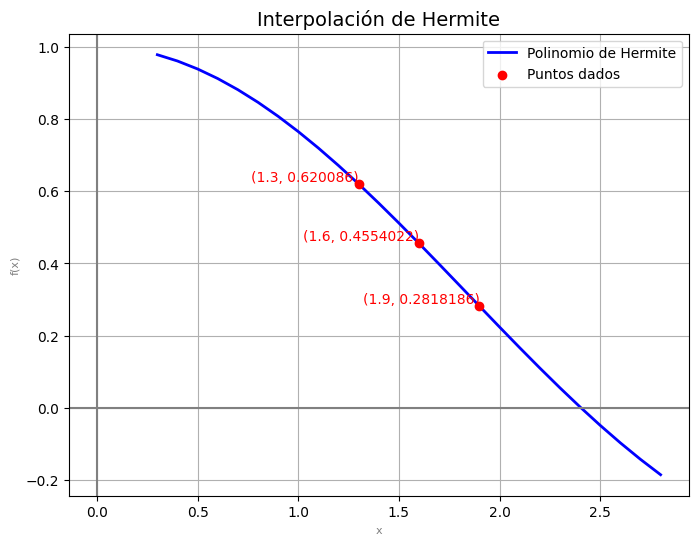

In [93]:
# Obtenemos el resultado de la evaluacion del polinomio de Hermite
result, expanded_poly, z, Q = hermite_interpolation(x_vals, f_vals, f_prime_vals, x_eval)

# Imprimimos el valor evaluado
print(f"\nY al evaluarlo en el polinomio en x = {x_eval} es: {result:.6f}")

# Graficamos el polinomio

# Definimos el rango de x para la grafica
x_plot = [i / 10.0 for i in range(int(min(x_vals) * 10) - 10, int(max(x_vals) * 10) + 10)]  # Generar valores de x de -10 a 10 pasos

# Evaluamos el polinomio para los valores de x en el rango definido
y_plot = [expanded_poly.subs(x, xi).evalf() for xi in x_plot]


# Creamos la grafica
plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot, label="Polinomio de Hermite", color='blue', lw=2)

# Graficar los puntos dados por el usuario
plt.scatter(x_vals, f_vals, color='red', label="Puntos dados", zorder=5)

# Añadimos texto a cada punto
for i in range(len(x_vals)):
    plt.text(x_vals[i], f_vals[i], f"({x_vals[i]}, {f_vals[i]})", color='red', fontsize=10, ha='right', va='bottom')


# Etiquetas y titulo
plt.title("Interpolación de Hermite", fontsize=14)
plt.xlabel("x", fontsize=8, color="gray")
plt.ylabel("f(x)", fontsize=8, color="gray")
plt.axhline(0, color="gray")
plt.axvline(0, color="gray")
plt.grid(True)
plt.legend()
plt.savefig("output.png") # Guardamos grafico como imagen PNG
plt.show()

En este programa dada una tabla con datos  devuelve el polinomio de interpolación de Hermite y su respectiva grafica

\begin{array}{|c|c|c|c|}
\hline
k & x_k & f(x_k) & f'(x_k) \\
\hline
0 & 1.3 & 0.6200860 & -0.5220232 \\
1 & 1.6 & 0.4554022 & -0.5698959 \\
2 & 1.9 & 0.2818186 & -0.5811571 \\
\hline
\end{array}

Además, evaluamos en un valor de x en este caso $x=1.5$